In [1]:
print('Skin diseases and Arcenic')

Skin diseases and Arcenic


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [3]:
path = '/kaggle/input/skin-diseases-dataset/DATASET'
print(os.listdir(path))

['Eczema', 'Melanoma', 'Acne', 'Normal', 'Arsenic', 'Psoriasis']


In [4]:
# map dataset
data = {
    'Eczema': list(os.listdir(os.path.join(path, 'Eczema'))), #Eczema
    'Melanoma': list(os.listdir(os.path.join(path, 'Melanoma'))), #Melanoma
    'Normal': list(os.listdir(os.path.join(path, 'Normal'))), #Normal
    'Arsenic': list(os.listdir(os.path.join(path, 'Arsenic'))), #Arsenic
    'Psoriasis': list(os.listdir(os.path.join(path, 'Psoriasis'))), #Psoriasis
}

label = {
    'Eczema': 0,
    'Melanoma': 1,
    'Normal': 2,
    'Arsenic': 3,
    'Psoriasis': 4,
}

In [5]:
data["Normal"][0]

'istockphoto-1606756923-612x612.jpg'

In [6]:
import cv2 as cv
import numpy as np
import matplotlib.pylab as plt
from PIL import Image

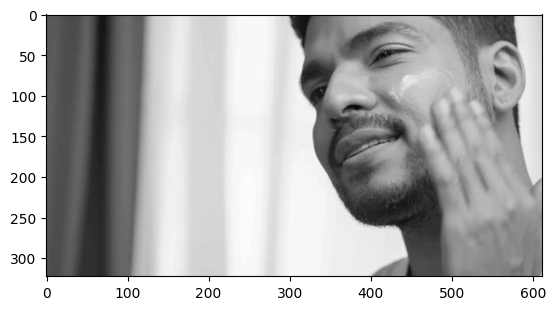

In [7]:
img = cv.imread(os.path.join(path, 'Normal', data["Normal"][0]))
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')

In [8]:
# img = cv.imread(os.path.join(path, 'Eczema', data[0][0]))
# gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
# enhanced_image = clahe.apply(gray_image)
# img_blur = cv.GaussianBlur(img, (9, 9), 10)
# alpha = 1.5  # Control the amount of sharpening
# sharpened_img = cv.addWeighted(img, 1 + alpha, img_blur, -alpha, 0)
# sharpened_color_image = cv2.cvtColor(sharpened_img, cv2.COLOR_BGR2RGB)
# resized_img = cv2.resize(sharpened_color_image,(224,224))
# plt.imshow(resized_img)  # Convert BGR to RGB for display
# plt.axis('off')  # Hide axis for a cleaner display
# plt.show()

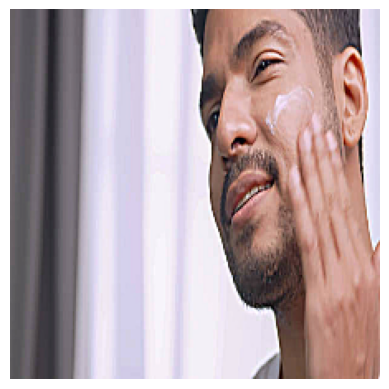

In [9]:
# Step 1: Read the original image
img = cv.imread(os.path.join(path, 'Normal', data["Normal"][0]))

# Step 2: Convert the image to grayscale for CLAHE
gray_image = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Step 3: Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
enhanced_image = clahe.apply(gray_image)

# Step 4: Apply Gaussian blur to the original image (not grayscale)
img_blur = cv.GaussianBlur(img, (9, 9), 10)

# Step 5: Apply Unsharp Masking for sharpening
alpha = 1.5  # Control the amount of sharpening
sharpened_img = cv.addWeighted(img, 1 + alpha, img_blur, -alpha, 0)

# No need to convert to RGB since the image is already in BGR format
# sharpened_img is already a color (BGR) image

# Step 6: Display the resulting sharpened color image
resized_img = cv.resize(sharpened_img,(224,224))
plt.imshow(cv.cvtColor(resized_img, cv.COLOR_BGR2RGB))  # Convert BGR to RGB for display
plt.axis('off')  # Hide axis for a cleaner display
plt.show()

In [10]:
def show_img(img_array):
    plt.imshow(img_array) 
    plt.axis('off')  
    plt.show()

In [11]:
def enhanced_image_process(file_path):
    kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
    
    img = cv.imread(file_path)
    gray_image = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    
    clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced_image = clahe.apply(gray_image)
    
    img_blur = cv.GaussianBlur(img, (5, 5), 0)
    sharpened_img = cv.addWeighted(img, 1 + alpha, img_blur, -alpha, 0)
    resized_img = cv.resize(sharpened_img,(224,224))
    img_rgb = cv.cvtColor(resized_img, cv.COLOR_BGR2RGB)

    return img_rgb

In [12]:
def normalize_image(img_array):
    image_float = img_array.astype(np.float32)
    normalized_image = image_float / 255.0
    return normalized_image

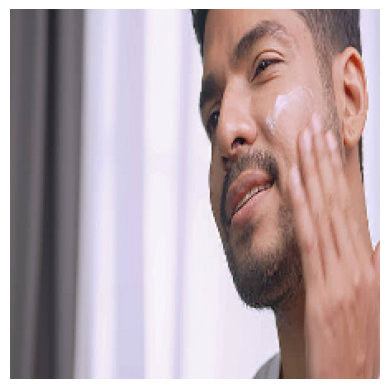

In [13]:
res = enhanced_image_process(os.path.join(path, 'Normal', data["Normal"][0]))

show_img(normalize_image(res))

In [14]:
X = []
Y = []
data_count = 0
for class_name,img_list in data.items():
    for img in img_list:
        img_path = os.path.join(path, class_name, img)
        img = enhanced_image_process(img_path)
        norm_img = normalize_image(img)
        X.append(norm_img)
        Y.append(label[class_name])
        data_count = data_count + 1
print(data_count)

7357


In [15]:
x = np.array(X)
y = np.array(Y)

In [16]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42, shuffle=True)

In [17]:
print(len(x_train))
print(len(y_train))

print(len(x_test))
print(len(y_test))

5885
5885
1472
1472


In [21]:
from tensorflow.keras.layers import GlobalMaxPooling2D, Dense, Normalization, BatchNormalization, Flatten, Dropout, Input
from tensorflow.keras.models import Model

In [19]:
from keras.applications.vgg16 import VGG16
base_model = VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3),
)
for layer in base_model.layers:
  layer.trainable = False

In [22]:
x = base_model.output

# x = Dense(516, activation='relu')(x)
# x = Dropout(rate=0.5)(x)
# x = Dense(256, activation='relu')(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(rate=0.5)(x)
output = Dense(5, activation='sigmoid')(x)

vgg16_model = Model(inputs = base_model.input, outputs = output)

vgg16_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,562,821 (105.14 MB)

 Trainable params: 12,848,133 (49.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [26]:
vgg16_model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
history_vgg = vgg16_model.fit(x_train,y_train,batch_size=32,epochs=20,validation_data=(x_test,y_test))

Epoch 1/20


I0000 00:00:1726850428.231602     213 service.cc:145] XLA service 0x7fbee8005de0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1726850428.231667     213 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1726850428.231673     213 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  1/184 ━━━━━━━━━━━━━━━━━━━━ 51:50 17s/step - accuracy: 0.1562 - loss: 1.8692

I0000 00:00:1726850443.785722     213 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


184/184 ━━━━━━━━━━━━━━━━━━━━ 62s 245ms/step - accuracy: 0.5829 - loss: 2.0794 - val_accuracy: 0.7840 - val_loss: 0.4774
Epoch 2/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 29s 158ms/step - accuracy: 0.7770 - loss: 0.5018 - val_accuracy: 0.8254 - val_loss: 0.3954
Epoch 3/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 28s 154ms/step - accuracy: 0.8113 - loss: 0.4204 - val_accuracy: 0.8077 - val_loss: 0.4000
Epoch 4/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 28s 154ms/step - accuracy: 0.8280 - loss: 0.3916 - val_accuracy: 0.8159 - val_loss: 0.3906
Epoch 5/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 29s 156ms/step - accuracy: 0.8444 - loss: 0.3569 - val_accuracy: 0.8295 - val_loss: 0.3553
Epoch 6/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 29s 155ms/step - accuracy: 0.8450 - loss: 0.3454 - val_accuracy: 0.8064 - val_loss: 0.3959
Epoch 7/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 29s 155ms/step - accuracy: 0.8465 - loss: 0.3461 - val_accuracy: 0.8383 - val_loss: 0.3489
Epoch 8/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 29s 155ms/step - accuracy: 0.8634 - loss: 0.3076 - val

In [27]:
from sklearn.metrics import classification_report,accuracy_score
y_pred1 = vgg16_model.predict(x_test)
y_pred=np.argmax(y_pred1,axis=1)
print(classification_report(y_test,y_pred))

46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step
              precision    recall  f1-score   support

           0       0.79      0.53      0.63       316
           1       0.99      0.99      0.99       328
           2       0.99      0.95      0.97       340
           3       0.91      0.98      0.95       141
           4       0.66      0.86      0.75       347

    accuracy                           0.85      1472
   macro avg       0.87      0.86      0.86      1472
weighted avg       0.86      0.85      0.85      1472



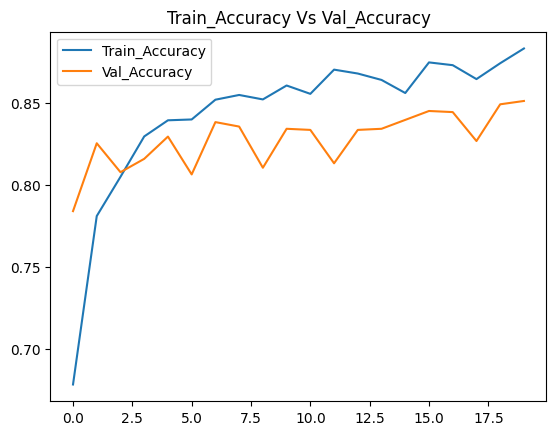

In [31]:
import matplotlib.pyplot as plt
plt.title('Train_Accuracy Vs Val_Accuracy')
plt.plot(history_vgg.history['accuracy'], label='Train_Accuracy')
plt.plot(history_vgg.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.show();

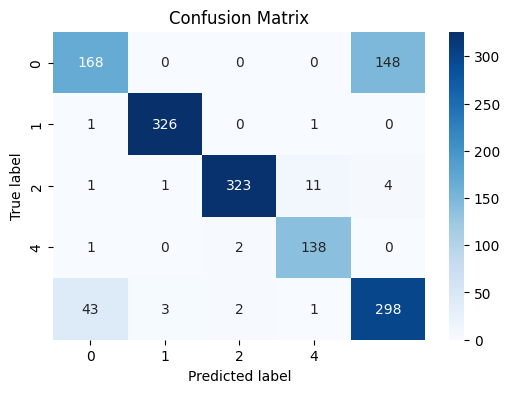

In [33]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y_test,y_pred)

# Create a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['0','1','2','4'],
            yticklabels=['0','1','2','4'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [34]:
x = base_model.output

x = Flatten()(x)
x = Dense(516, activation='relu')(x)
x = Dropout(rate=0.5)(x)

x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dropout(rate=0.5)(x)

output = Dense(5, activation='sigmoid')(x)

vgg16_model2 = Model(inputs = base_model.input, outputs = output)

vgg16_model2.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 516)            │    12,945,924 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 516)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       132,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             

 Total params: 27,826,505 (106.15 MB)

 Trainable params: 13,111,817 (50.02 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [35]:
vgg16_model2.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
history_vgg2 = vgg16_model2.fit(x_train,y_train,batch_size=32,epochs=20,validation_data=(x_test,y_test))

Epoch 1/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 42s 197ms/step - accuracy: 0.4329 - loss: 1.5885 - val_accuracy: 0.7018 - val_loss: 0.6375
Epoch 2/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 29s 157ms/step - accuracy: 0.6525 - loss: 0.7545 - val_accuracy: 0.7201 - val_loss: 0.5384
Epoch 3/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 29s 159ms/step - accuracy: 0.7003 - loss: 0.6192 - val_accuracy: 0.7792 - val_loss: 0.4945
Epoch 4/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 28s 155ms/step - accuracy: 0.7062 - loss: 0.5848 - val_accuracy: 0.8023 - val_loss: 0.4480
Epoch 5/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 29s 156ms/step - accuracy: 0.7405 - loss: 0.5367 - val_accuracy: 0.8084 - val_loss: 0.4490
Epoch 6/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 29s 157ms/step - accuracy: 0.7261 - loss: 0.5396 - val_accuracy: 0.7568 - val_loss: 0.4271
Epoch 7/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 29s 155ms/step - accuracy: 0.7493 - loss: 0.5249 - val_accuracy: 0.8125 - val_loss: 0.3967
Epoch 8/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 29s 156ms/step - accuracy: 0.7533 - loss: 0

In [38]:
import tensorflow as tf
base_mobnet = tf.keras.applications.MobileNetV2(
    input_shape=(224,224,3),
    alpha=1.0,
    include_top=False,
    weights="imagenet",
)
for layer in base_mobnet.layers:
  layer.trainable = False

x = base_mobnet.output

x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(rate=0.5)(x)
output = Dense(5, activation='sigmoid')(x)

mobV2_model = Model(inputs = base_mobnet.input, outputs = output)

mobV2_model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 34,373,701 (131.13 MB)

 Trainable params: 32,115,717 (122.51 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [39]:
mobV2_model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
history_mobV2 = mobV2_model.fit(x_train,y_train,batch_size=32,epochs=20,validation_data=(x_test,y_test))

Epoch 1/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 30s 102ms/step - accuracy: 0.5920 - loss: 6.0826 - val_accuracy: 0.7894 - val_loss: 0.3366
Epoch 2/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 0.7773 - loss: 0.3635 - val_accuracy: 0.7779 - val_loss: 0.3144
Epoch 3/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - accuracy: 0.7694 - loss: 0.3454 - val_accuracy: 0.7996 - val_loss: 0.3226
Epoch 4/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - accuracy: 0.7700 - loss: 0.3108 - val_accuracy: 0.7928 - val_loss: 0.3615
Epoch 5/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - accuracy: 0.7770 - loss: 0.2796 - val_accuracy: 0.7840 - val_loss: 0.3341
Epoch 6/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - accuracy: 0.7749 - loss: 0.2502 - val_accuracy: 0.7602 - val_loss: 0.3209
Epoch 7/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - accuracy: 0.7586 - loss: 0.2111 - val_accuracy: 0.8118 - val_loss: 0.3231
Epoch 8/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - accuracy: 0.7957 - loss: 0.2386 - val_ac

46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step
              precision    recall  f1-score   support

           0       0.63      0.75      0.69       316
           1       0.99      1.00      0.99       328
           2       0.97      0.95      0.96       340
           3       0.96      0.93      0.95       141
           4       0.72      0.61      0.66       347

    accuracy                           0.84      1472
   macro avg       0.85      0.85      0.85      1472
weighted avg       0.84      0.84      0.84      1472



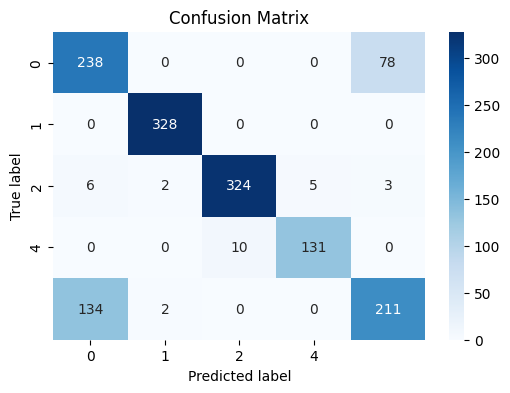

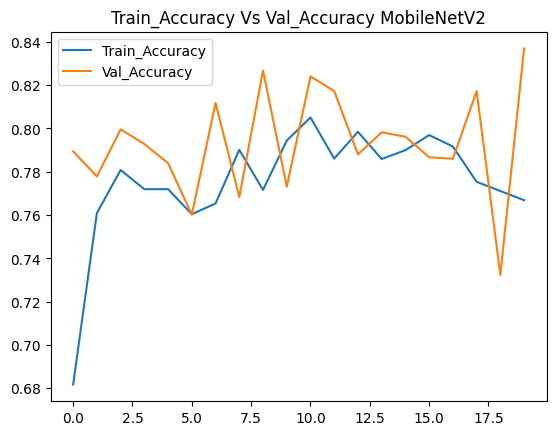

In [40]:
y_pred1 = mobV2_model.predict(x_test)
y_pred=np.argmax(y_pred1,axis=1)
print(classification_report(y_test,y_pred))

# Calculate confusion matrix
cm = confusion_matrix(y_test,y_pred)

# Create a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['0','1','2','4'],
            yticklabels=['0','1','2','4'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

plt.title('Train_Accuracy Vs Val_Accuracy MobileNetV2')
plt.plot(history_mobV2.history['accuracy'], label='Train_Accuracy')
plt.plot(history_mobV2.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.show();

In [41]:
base_inceprionV3 = tf.keras.applications.InceptionV3(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3),
)
for layer in base_inceprionV3.layers:
  layer.trainable = False

x = base_inceprionV3.output

x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(rate=0.5)(x)

output = Dense(5, activation='sigmoid')(x)

inceprionV3_model = Model(inputs = base_inceprionV3.input, outputs = output)
inceprionV3_model.summary()

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 111, 111,  │        864 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 111, 111,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 109, 109,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 109, 109,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 54, 54,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 54, 54,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 52, 52,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 52,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 52, 52,    │          0 │ batch_normalizat

 Total params: 48,020,261 (183.18 MB)

 Trainable params: 26,217,477 (100.01 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [42]:
inceprionV3_model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
history_inceprionV3 = inceprionV3_model.fit(x_train,y_train,batch_size=32,epochs=20,validation_data=(x_test,y_test))

Epoch 1/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 49s 172ms/step - accuracy: 0.5670 - loss: 8.3108 - val_accuracy: 0.7711 - val_loss: 0.4559
Epoch 2/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 15s 81ms/step - accuracy: 0.7630 - loss: 0.4669 - val_accuracy: 0.8043 - val_loss: 0.3551
Epoch 3/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 15s 81ms/step - accuracy: 0.7931 - loss: 0.3949 - val_accuracy: 0.7935 - val_loss: 0.3725
Epoch 4/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 15s 81ms/step - accuracy: 0.7990 - loss: 0.4015 - val_accuracy: 0.8200 - val_loss: 0.3322
Epoch 5/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 15s 81ms/step - accuracy: 0.7939 - loss: 0.3549 - val_accuracy: 0.8179 - val_loss: 0.3280
Epoch 6/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 15s 80ms/step - accuracy: 0.7971 - loss: 0.3576 - val_accuracy: 0.8268 - val_loss: 0.3434
Epoch 7/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 15s 80ms/step - accuracy: 0.7957 - loss: 0.3664 - val_accuracy: 0.8220 - val_loss: 0.3341
Epoch 8/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 15s 81ms/step - accuracy: 0.7845 - loss: 0.3369 -

46/46 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step
              precision    recall  f1-score   support

           0       0.52      0.89      0.66       316
           1       0.99      1.00      1.00       328
           2       0.97      0.96      0.97       340
           3       0.94      0.89      0.92       141
           4       0.70      0.27      0.39       347

    accuracy                           0.79      1472
   macro avg       0.83      0.80      0.79      1472
weighted avg       0.81      0.79      0.77      1472



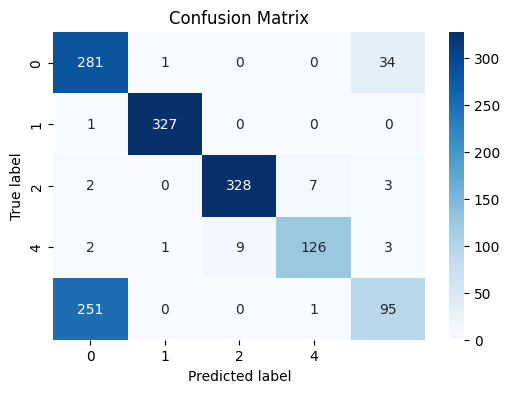

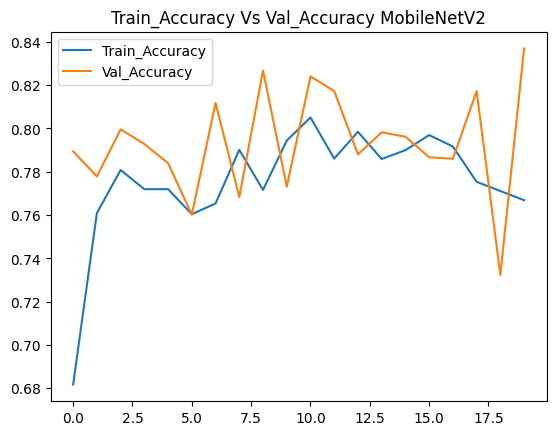

In [43]:
y_pred1 = inceprionV3_model.predict(x_test)
y_pred=np.argmax(y_pred1,axis=1)
print(classification_report(y_test,y_pred))

# Calculate confusion matrix
cm = confusion_matrix(y_test,y_pred)

# Create a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['0','1','2','4'],
            yticklabels=['0','1','2','4'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

plt.title('Train_Accuracy Vs Val_Accuracy InceptionV3')
plt.plot(history_inceprionV3.history['accuracy'], label='Train_Accuracy')
plt.plot(history_inceprionV3.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.show();

In [44]:
base_convNext = tf.keras.applications.ConvNeXtBase(
    model_name="convnext_base",
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3),
    pooling=None,
    classes=3,
    classifier_activation="softmax",
)
for layer in base_convNext.layers:
  layer.trainable = False

x = base_convNext.output

x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(rate=0.5)(x)

output = Dense(5, activation='sigmoid')(x)

convNext_model = Model(inputs = base_convNext.input, outputs = output)
convNext_model.summary()

350926856/350926856 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_base_pres… │ (None, 224, 224,  │          0 │ input_layer_3[0]… │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_base_stem  │ (None, 56, 56,    │      6,528 │ convnext_base_pr… │
│ (Sequential)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_base_stag… │ (None, 56, 56,    │      6,400 │ convnext_base_st… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_base_stag… │ (None, 56, 56,    │        256 │ convnext_base_st… │
│ (LayerNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_base_stag… │ (None, 56, 56,    │     66,048 │ convnext_base_st… │
│ (Dense)             │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_base_stag… │ (None, 56, 56,    │          0 │ convnext_base_st… │
│ (Activation)        │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_base_stag… │ (None, 56, 56,    │     65,664 │ convnext_base_st… │
│ (Dense)             │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_base_stag… │ (None, 56, 56,    │        128 │ convnext_base_st… │
│ (LayerScale)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_base_stag… │ (None, 56, 56,    │          0 │ convnext_base_st… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 56, 56,    │          0 │ convnext_base_st… │
│                     │ 128)              │            │ convnext_base_st… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_base_stag… │ (None, 56, 56,    │      6,400 │ add[0][0]         │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_base_stag… │ (None, 56, 56,    │        256 │ convnext_base_st… │
│ (LayerNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_base_stag… │ (None, 56, 56,    │     66,048 │ convnext_base_st… │
│ (Dense)             │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_base_stag… │ (None, 56, 56,    │          0 │ convnext_base_st… │
│ (Activation)        │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_base_stag… │ (None, 56, 56,    │     65,664 │ convnext_base_st… │
│ (Dense)             │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_base_stag… │ (None, 56, 56,    │        128 │ convnext_base_st

 Total params: 113,259,653 (432.05 MB)

 Trainable params: 25,693,189 (98.01 MB)

 Non-trainable params: 87,566,464 (334.04 MB)

In [45]:
convNext_model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
history_convNext = convNext_model.fit(x_train,y_train,batch_size=32,epochs=20,validation_data=(x_test,y_test))

Epoch 1/20


I0000 00:00:1726853071.244049    1666 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_66', 1300 bytes spill stores, 1284 bytes spill loads

I0000 00:00:1726853077.202860    1665 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_12', 1032 bytes spill stores, 1032 bytes spill loads



183/184 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step - accuracy: 0.3349 - loss: 8.9671

I0000 00:00:1726853155.395522    1703 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_12', 1032 bytes spill stores, 1032 bytes spill loads

I0000 00:00:1726853158.984940    1704 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_66', 1300 bytes spill stores, 1284 bytes spill loads



184/184 ━━━━━━━━━━━━━━━━━━━━ 143s 563ms/step - accuracy: 0.3354 - loss: 8.9099 - val_accuracy: 0.4219 - val_loss: 1.2879
Epoch 2/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 76s 412ms/step - accuracy: 0.3938 - loss: 1.3182 - val_accuracy: 0.4504 - val_loss: 1.1967
Epoch 3/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 75s 410ms/step - accuracy: 0.4326 - loss: 1.2587 - val_accuracy: 0.4355 - val_loss: 1.2294
Epoch 4/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 75s 410ms/step - accuracy: 0.4303 - loss: 1.2531 - val_accuracy: 0.4293 - val_loss: 1.2117
Epoch 5/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 75s 409ms/step - accuracy: 0.4464 - loss: 1.1968 - val_accuracy: 0.4694 - val_loss: 1.2131
Epoch 6/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 75s 410ms/step - accuracy: 0.4709 - loss: 1.2011 - val_accuracy: 0.4674 - val_loss: 1.2077
Epoch 7/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 75s 410ms/step - accuracy: 0.4452 - loss: 1.2278 - val_accuracy: 0.4789 - val_loss: 1.2000
Epoch 8/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 75s 410ms/step - accuracy: 0.4646 - loss: 1.1907 - va

46/46 ━━━━━━━━━━━━━━━━━━━━ 20s 318ms/step


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.69      0.20      0.31       316
           1       0.67      0.94      0.78       328
           2       0.97      0.69      0.81       340
           3       0.00      0.00      0.00       141
           4       0.44      0.86      0.58       347

    accuracy                           0.61      1472
   macro avg       0.55      0.54      0.50      1472
weighted avg       0.62      0.61      0.56      1472



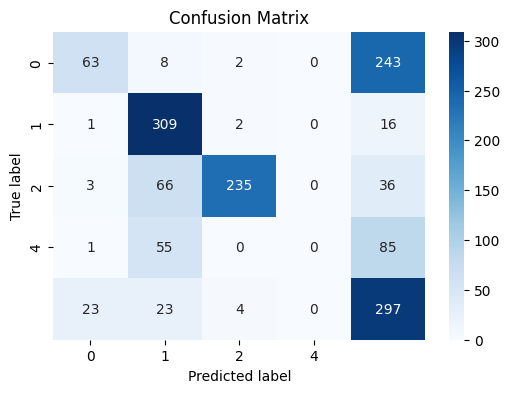

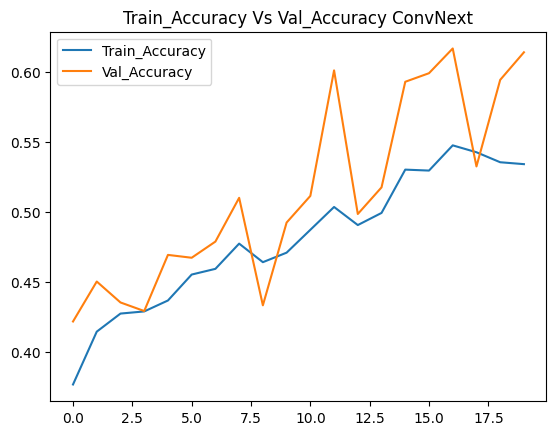

In [46]:
y_pred1 = convNext_model.predict(x_test)
y_pred=np.argmax(y_pred1,axis=1)
print(classification_report(y_test,y_pred))

# Calculate confusion matrix
cm = confusion_matrix(y_test,y_pred)

# Create a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['0','1','2','4'],
            yticklabels=['0','1','2','4'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

plt.title('Train_Accuracy Vs Val_Accuracy ConvNext')
plt.plot(history_convNext.history['accuracy'], label='Train_Accuracy')
plt.plot(history_convNext.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.show();